В прилагаемом файле представлены данные, собранные путем голосования за самые лучшие (или, по крайней мере, самые популярные) конфеты Хэллоуина. Обучите модель логистической регрессии. В качестве предикторов выступают поля: chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent, отклик — Y.



In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#чтение данных, так как названия конфет уникальны, используем их в качестве индекса
#import pandas as pd
DATA = pd.read_csv("candy-data.csv", delimiter=',', index_col='competitorname')
test= pd.read_csv("candy-test.csv", delimiter=',', index_col='competitorname')
y_test=test["Y"]
X_test=test.drop('Y', axis=1)

In [3]:

test.shape

(15, 12)

In [4]:

DATA.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [5]:
display(DATA.columns)
display(DATA.head())
display(DATA.shape)

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent', 'Y'],
      dtype='object')

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


(70, 13)

В качестве тренировочного набора данных используйте данные из файла, за иключением следующих конфет: Chewey Lemonhead Fruit Mix, Runts, Sixlets. Обучите модель.



In [6]:
DATA.index.unique()

Index(['100 Grand', '3 Musketeers', 'One dime', 'One quarter', 'Air Heads',
       'Almond Joy', 'Baby Ruth', 'Boston Baked Beans', 'Candy Corn',
       'Caramel Apple Pops', 'Charleston Chew', 'Chewey Lemonhead Fruit Mix',
       'Chiclets', 'Dots', 'Dum Dums', 'Fruit Chews', 'Fun Dip', 'Gobstopper',
       'Haribo Gold Bears', 'Haribo Happy Cola', 'Haribo Sour Bears',
       'Haribo Twin Snakes', 'Hersheys Kisses', 'Hersheys Krackel',
       'Hersheys Milk Chocolate', 'Hersheys Special Dark', 'Jawbusters',
       'Junior Mints', 'Kit Kat', 'Laffy Taffy', 'Lemonhead',
       'Lifesavers big ring gummies', 'Peanut butter M&Ms', 'M&Ms',
       'Mike & Ike', 'Milk Duds', 'Milky Way', 'Milky Way Midnight',
       'Milky Way Simply Caramel', 'Mounds', 'Mr Good Bar', 'Nerds',
       'Nestle Butterfinger', 'Nestle Crunch', 'Nik L Nip', 'Now & Later',
       'Payday', 'Peanut M&Ms', 'Pixie Sticks', 'Pop Rocks', 'Red vines',
       'Reeses Miniatures', 'Reeses Peanut Butter cup', 'Reeses piece

In [7]:
mask=((DATA.index!= 'Chewey Lemonhead Fruit Mix' ) & (DATA.index!= 'Runts' ) &(DATA.index!= 'Sixlets' )) 
DATA=DATA[mask]
DATA.index.unique()

Index(['100 Grand', '3 Musketeers', 'One dime', 'One quarter', 'Air Heads',
       'Almond Joy', 'Baby Ruth', 'Boston Baked Beans', 'Candy Corn',
       'Caramel Apple Pops', 'Charleston Chew', 'Chiclets', 'Dots', 'Dum Dums',
       'Fruit Chews', 'Fun Dip', 'Gobstopper', 'Haribo Gold Bears',
       'Haribo Happy Cola', 'Haribo Sour Bears', 'Haribo Twin Snakes',
       'Hersheys Kisses', 'Hersheys Krackel', 'Hersheys Milk Chocolate',
       'Hersheys Special Dark', 'Jawbusters', 'Junior Mints', 'Kit Kat',
       'Laffy Taffy', 'Lemonhead', 'Lifesavers big ring gummies',
       'Peanut butter M&Ms', 'M&Ms', 'Mike & Ike', 'Milk Duds', 'Milky Way',
       'Milky Way Midnight', 'Milky Way Simply Caramel', 'Mounds',
       'Mr Good Bar', 'Nerds', 'Nestle Butterfinger', 'Nestle Crunch',
       'Nik L Nip', 'Now & Later', 'Payday', 'Peanut M&Ms', 'Pixie Sticks',
       'Pop Rocks', 'Red vines', 'Reeses Miniatures',
       'Reeses Peanut Butter cup', 'Reeses pieces',
       'Reeses stuffed wit

In [8]:
#обучение модели будем проводить на данных, за исключением некоторых конфет
train_data = DATA
X = pd.DataFrame(train_data.drop(['winpercent','Y'], axis=1))

#отбор столбца для отклика
y = pd.DataFrame(train_data['Y'])

Обучение модели логистической регрессии

Если используете Python, используйте модель с параметрами: LogisticRegression(random_state=2019, solver='lbfgs').
Обучите модель и выполните предсказание для всех конфет из прилагаемого файла (candy-test.csv) тестовых данных.

Введите вероятность отнесения конфеты Tootsie Roll Juniors к классу 1:


In [9]:
#подключение модели логистической регрессии из библиотеки sklearn
#from sklearn.linear_model import LogisticRegression

In [10]:
#обучение модели
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y.values.ravel())

Предсказание результатов с помощью обученной модели

In [11]:
#предсказание для сладости, введенной вручную, вероятности указаны для классов 0 и 1 соответственно 
y_pred_proba=reg.predict_proba(X_test)
y_pred_proba

array([[0.7139617 , 0.2860383 ],
       [0.59994557, 0.40005443],
       [0.65127668, 0.34872332],
       [0.59820116, 0.40179884],
       [0.21972227, 0.78027773],
       [0.28300469, 0.71699531],
       [0.25917458, 0.74082542],
       [0.19733419, 0.80266581],
       [0.61463447, 0.38536553],
       [0.60741035, 0.39258965],
       [0.64305556, 0.35694444],
       [0.8504666 , 0.1495334 ],
       [0.61770122, 0.38229878],
       [0.40990595, 0.59009405],
       [0.21476576, 0.78523424]])

Введите вероятность отнесения конфеты Tootsie Roll Juniors к классу 1:

In [12]:
Tootsie_Roll_Juniors = X_test.loc['Tootsie Roll Juniors',:].to_frame().T
Tootsie_Roll_Juniors_proba=reg.predict_proba(Tootsie_Roll_Juniors)
Tootsie_Roll_Juniors_proba

array([[0.28300469, 0.71699531]])

Введите вероятность отнесения конфеты Tootsie Roll Midgies к классу 1:


In [13]:
Tootsie_Roll_Midgies = X_test.loc['Tootsie Roll Midgies',:].to_frame().T
Tootsie_Roll_Midgies_proba=reg.predict_proba(Tootsie_Roll_Midgies)
Tootsie_Roll_Midgies_proba

array([[0.25917458, 0.74082542]])

In [14]:
reg.predict(Tootsie_Roll_Juniors)

array([1], dtype=int64)

Выполните оценку модели с помощью матрицы ошибок и рассчитайте следующие параметры при пороге отсечения (Treshhold)=0.5.



In [15]:
#предсказание с помощью обученной модели, порог отсечения по умолчанию составляет 0.5
Y_pred = reg.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [16]:
#вероятности отнесения к 0 и 1 классу объектов тестовых данных соответствнно
Y_pred_probs = reg.predict_proba(X_test)
Y_pred_probs

array([[0.7139617 , 0.2860383 ],
       [0.59994557, 0.40005443],
       [0.65127668, 0.34872332],
       [0.59820116, 0.40179884],
       [0.21972227, 0.78027773],
       [0.28300469, 0.71699531],
       [0.25917458, 0.74082542],
       [0.19733419, 0.80266581],
       [0.61463447, 0.38536553],
       [0.60741035, 0.39258965],
       [0.64305556, 0.35694444],
       [0.8504666 , 0.1495334 ],
       [0.61770122, 0.38229878],
       [0.40990595, 0.59009405],
       [0.21476576, 0.78523424]])

In [17]:
#отбор вероятностей отнесения объектов к классу 1
Y_pred_probs_class_1 = Y_pred_probs[:, 1]
Y_pred_probs_class_1

array([0.2860383 , 0.40005443, 0.34872332, 0.40179884, 0.78027773,
       0.71699531, 0.74082542, 0.80266581, 0.38536553, 0.39258965,
       0.35694444, 0.1495334 , 0.38229878, 0.59009405, 0.78523424])

In [18]:
#отбор отклика Y из тестовых данных и преобразование в массив
Y_true = (test['Y'].to_frame().T).values.ravel()
Y_true

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [19]:
#подключение библиотеки для вычисления метрик
#from sklearn import metrics

In [20]:
fpr, tpr, _ = metrics.roc_curve(Y_true, Y_pred)

In [21]:
#вычисляем AUC
metrics.roc_auc_score(Y_true, Y_pred_probs_class_1)

0.86

In [22]:
#вычисление Recall
metrics.recall_score(Y_true, Y_pred)

0.6

In [23]:
#вычисление Precision
metrics.precision_score(Y_true, Y_pred)

0.5

In [24]:
#подключим библиотеки для визуализации
#import matplotlib.pyplot as plt
#%matplotlib inline

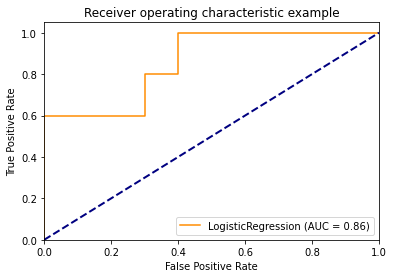

In [25]:
metrics.plot_roc_curve(reg, X_test, Y_true, color='darkorange') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()